In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point
import pyproj
from fiona.crs import from_epsg
import numpy as np
from geopandas import GeoDataFrame
import datetime
from datetime import timedelta, date

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

import statsmodels.api as sm

In [2]:
import tensorflow as tf

2022-12-13 07:51:16.712678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 07:51:16.856614: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-13 07:51:17.417754: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/skyriver/anaconda3/envs/seoul_bike/lib/
2022-12-13 07:51:17.417832: W tensorflow

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized
        print(e)

2022-12-13 07:51:18.038197: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libnvJitLink.so.12: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/skyriver/anaconda3/envs/seoul_bike/lib/
2022-12-13 07:51:18.040121: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# plt.rcParams["font.family"] = "NanumGothic"
# plt.rcParams["figure.figsize"] = (10,20)

In [7]:
bike_1 = pd.read_csv("./variable/bike_Gwang.csv", encoding="utf-8")
pop_1 = pd.read_csv("./variable/population_Gwang.csv", encoding="utf-8")
wea_1 = pd.read_csv("./variable/weather_Gwang.csv", encoding="utf-8")

In [8]:
bike_2 = pd.read_csv("./variable/bike_Dong.csv", encoding="utf-8")
pop_2 = pd.read_csv("./variable/population_Dong.csv", encoding="utf-8")
wea_2 = pd.read_csv("./variable/weather_Dong.csv", encoding="utf-8")

In [9]:
bike_3 = pd.read_csv("./variable/bike_Seong.csv", encoding="utf-8")
pop_3 = pd.read_csv("./variable/population_Seong.csv", encoding="utf-8")
wea_3 = pd.read_csv("./variable/weather_Seong.csv", encoding="utf-8")

In [10]:
bike_4 = pd.read_csv("./variable/bike_Jung.csv", encoding="utf-8")
pop_4 = pd.read_csv("./variable/population_Jung.csv", encoding="utf-8")
wea_4 = pd.read_csv("./variable/weather_Jung.csv", encoding="utf-8")

In [11]:
def concating(df1, df2, df3):
    data_1 = pd.merge(df1, df2, how="left", on="date")
    data_2 = pd.merge(data_1, df3, how="left", on="date")
    data_3 = data_2[['date', 'clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', '총생활인구수']]
    data_3["population"] = data_3["총생활인구수"]
    data_3.drop(["총생활인구수"], axis=1, inplace=True)
    return data_3

In [12]:
data_1 = concating(wea_1, bike_1, pop_1)
data_2 = concating(wea_2, bike_2, pop_2)
data_3 = concating(wea_3, bike_3, pop_3)
data_4 = concating(wea_4, bike_4, pop_4)

/tmp/ipykernel_4154155/4204003469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["population"] = data_3["총생활인구수"]
/tmp/ipykernel_4154155/4204003469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.drop(["총생활인구수"], axis=1, inplace=True)
/tmp/ipykernel_4154155/4204003469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [13]:
data_1

,date,clear_day,day_view_time,lst,bike_place,bike,population
0,2018-01-01,3488.000365,118.000000,13794.534913,37,554,419550.0456
1,2018-01-02,2032.498815,109.000000,13742.956244,37,554,419550.0456
2,2018-01-03,3226.988696,116.000000,13683.819690,37,554,419550.0456
3,2018-01-04,1981.037362,106.000000,13438.312372,37,554,419550.0456
4,2018-01-05,3105.680583,113.094257,13751.535278,37,554,419550.0456
...,...,...,...,...,...,...,...
1631,2022-06-20,4607.313708,118.639562,15088.622154,86,1121,388187.6048
1632,2022-06-21,3557.058341,113.179581,15189.111030,86,1121,387553.7112
1633,2022-06-22,2014.866180,107.000000,15320.371012,86,1121,381017.9273
1634,2022-06-23,967.839235,103.845647,15283.629662,86,1121,378675.3951


In [14]:
data_1.columns

Index(['date', 'clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'],
      dtype='object')

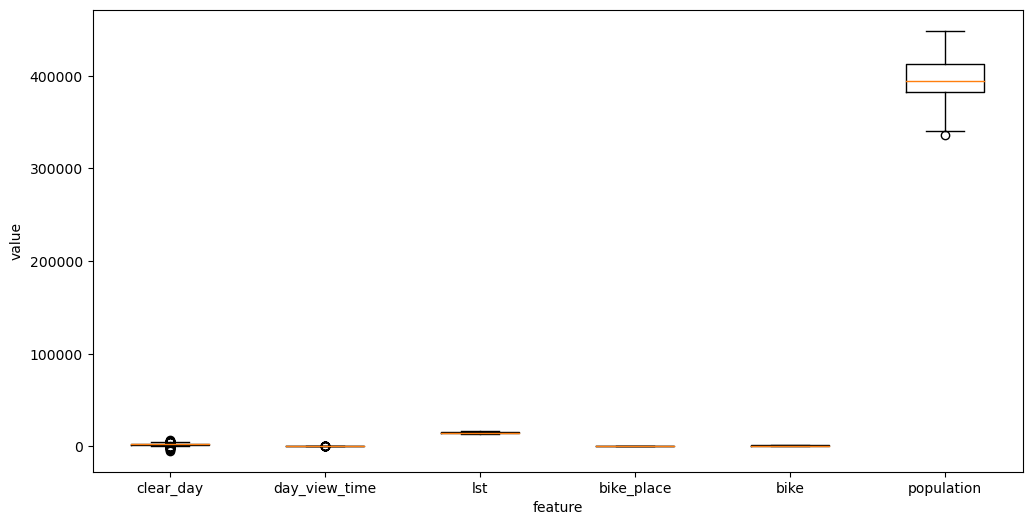

In [15]:
plt.figure(figsize=(12,6))
plt.boxplot(data_1[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

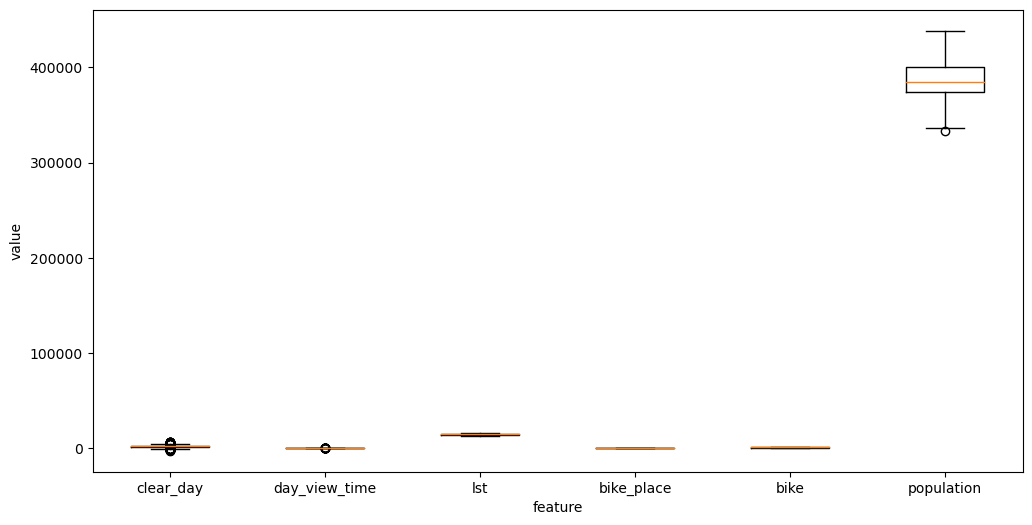

In [16]:
plt.figure(figsize=(12,6))
plt.boxplot(data_2[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

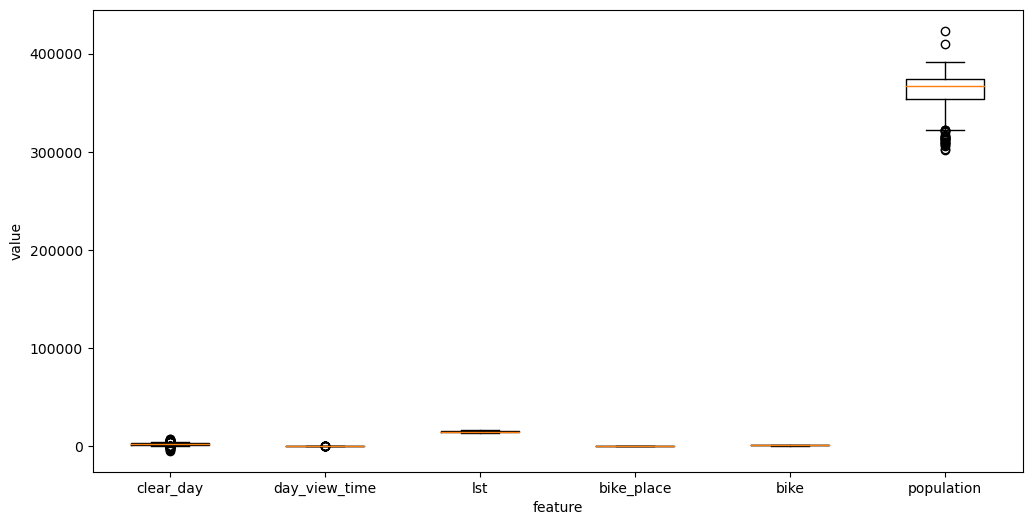

In [17]:
plt.figure(figsize=(12,6))
plt.boxplot(data_3[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

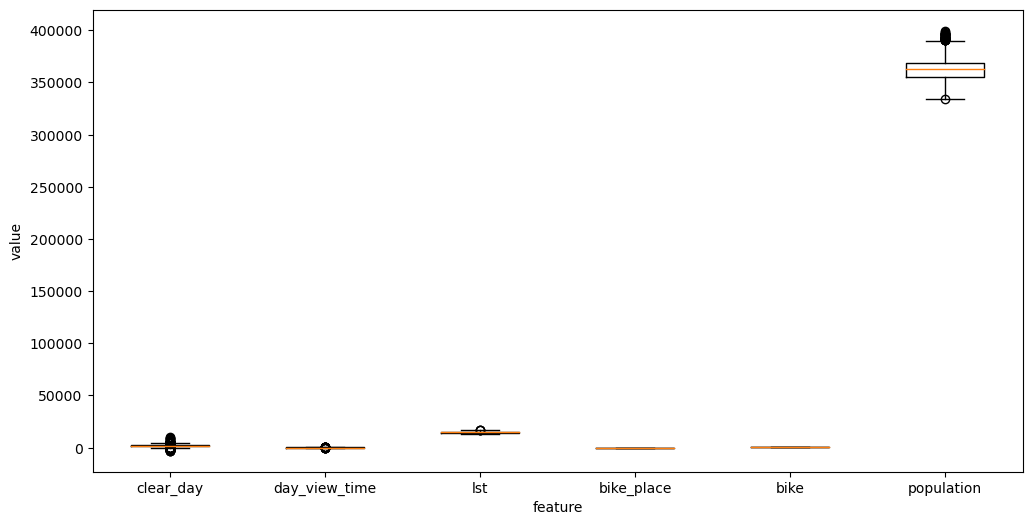

In [18]:
plt.figure(figsize=(12,6))
plt.boxplot(data_4[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

In [19]:
def spliting(data):
    data_train = data[:877]
    data_train.reset_index(drop=True, inplace=True)
    data_val = data[877:1169]
    data_val.reset_index(drop=True, inplace=True)
    data_test = data[1169:1461]
    data_test.reset_index(drop=True, inplace=True)
    return data_train, data_val, data_test

In [20]:
data_1_train, data_1_val, data_1_test = spliting(data_1)
data_2_train, data_2_val, data_2_test = spliting(data_2)
data_3_train, data_3_val, data_3_test = spliting(data_3)
data_4_train, data_4_val, data_4_test = spliting(data_4)

- 2021.12.31까지

In [21]:
print(len(data_1_train), len(data_1_val), len(data_1_test))

877 292 292


In [22]:
x_1_train = data_1_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_2_train = data_2_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_3_train = data_3_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_4_train = data_4_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]

In [23]:
x_1_val = data_1_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_2_val = data_2_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_3_val = data_3_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_4_val = data_4_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]

In [24]:
x_1_test = data_1_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_2_test = data_2_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_3_test = data_3_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_4_test = data_4_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]

In [25]:
def normalize(x_train, data, data_title):
    train_mean = np.mean(x_train, axis=0)
    train_std = np.std(x_train, axis=0)
    data_scaled = (data - train_mean) / train_std
    plt.figure(figsize=(12,5))
    plt.boxplot(data_scaled)
    plt.title(data_title)
    plt.xlabel("feature")
    plt.ylabel("value")
    plt.show()
    return data_scaled

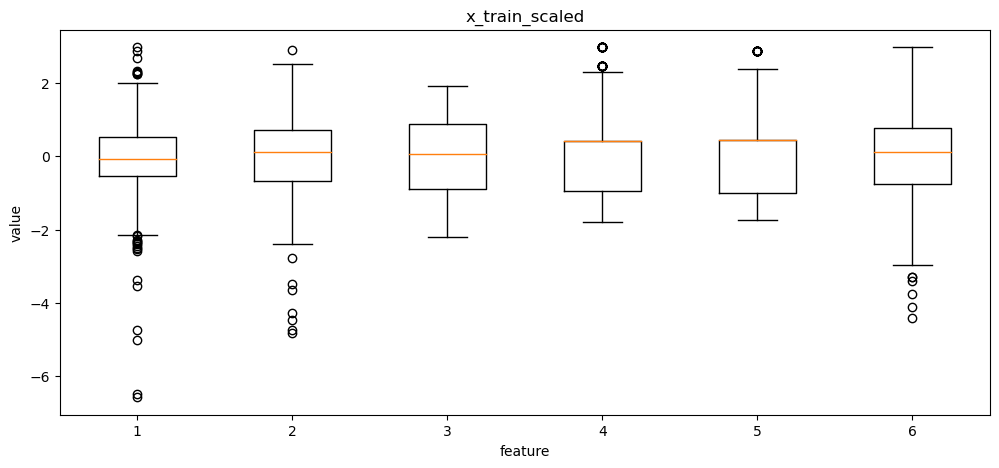

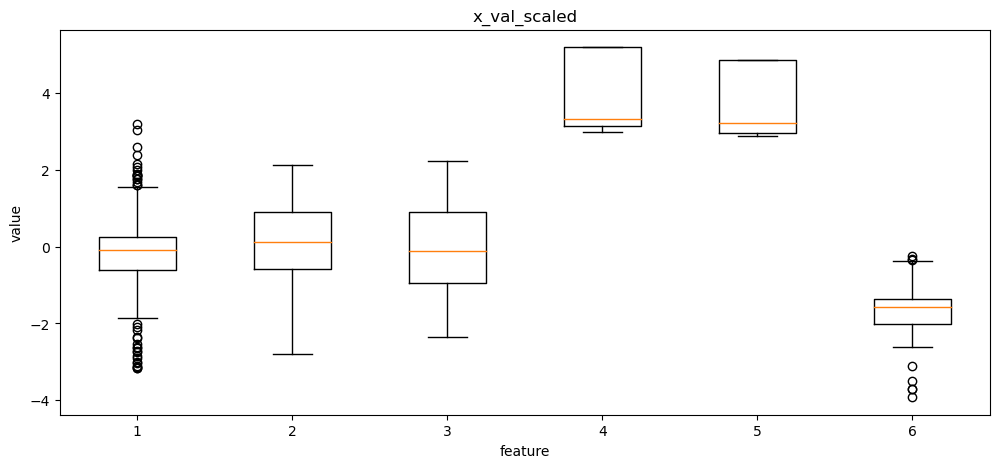

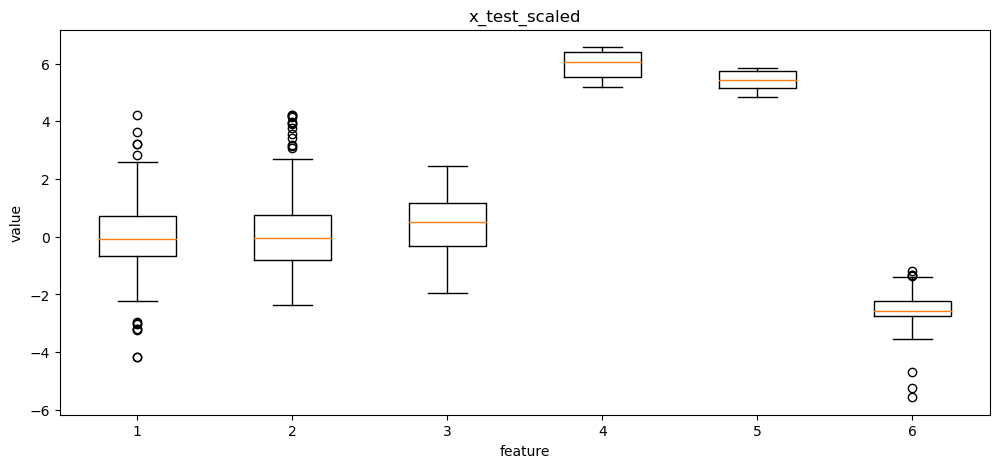

In [26]:
x_1_train_scaled = normalize(x_1_train, x_1_train, "x_train_scaled")
x_1_val_scaled = normalize(x_1_train, x_1_val, "x_val_scaled")
x_1_test_scaled = normalize(x_1_train, x_1_test, "x_test_scaled")

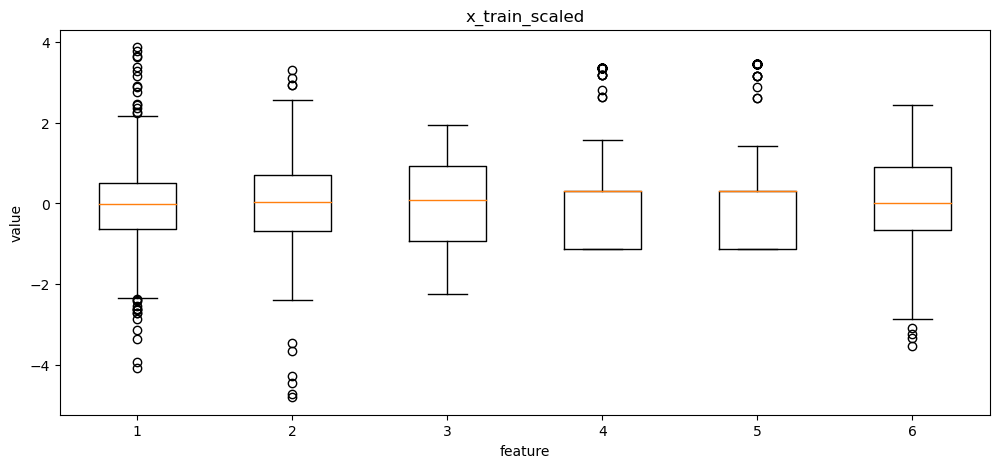

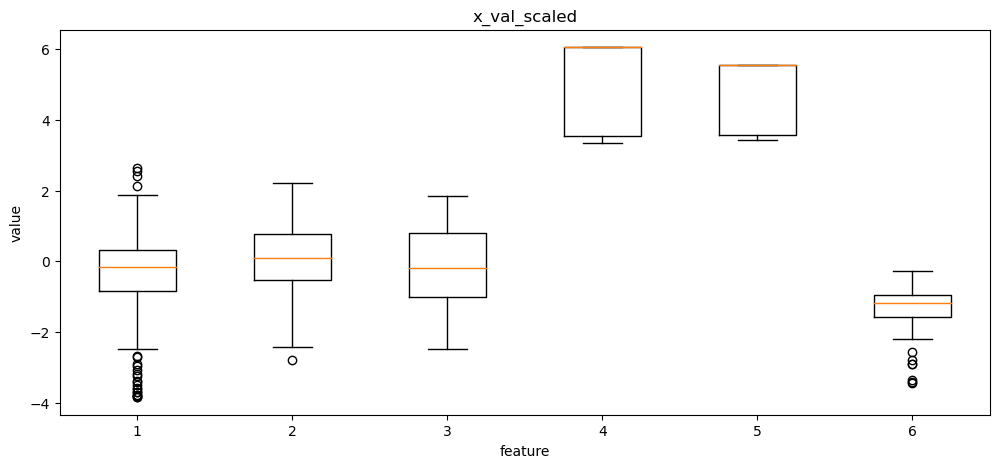

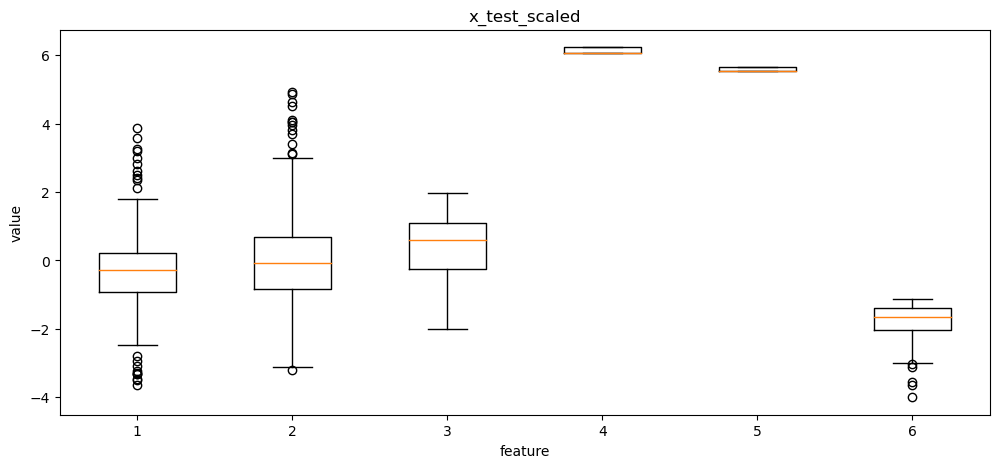

In [27]:
x_2_train_scaled = normalize(x_2_train, x_2_train, "x_train_scaled")
x_2_val_scaled = normalize(x_2_train, x_2_val, "x_val_scaled")
x_2_test_scaled = normalize(x_2_train, x_2_test, "x_test_scaled")

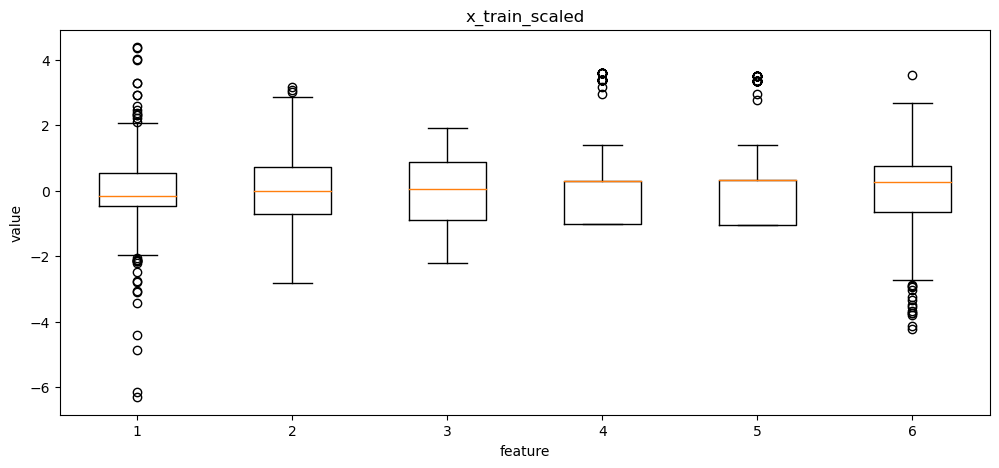

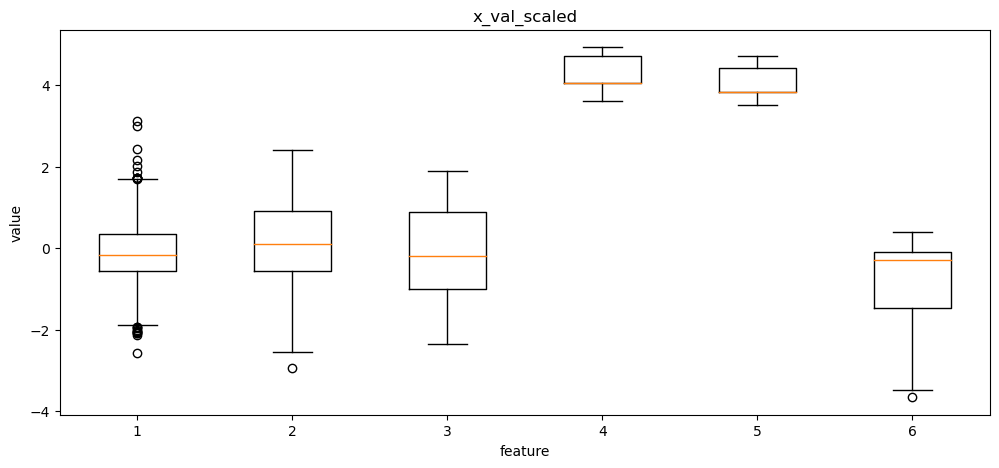

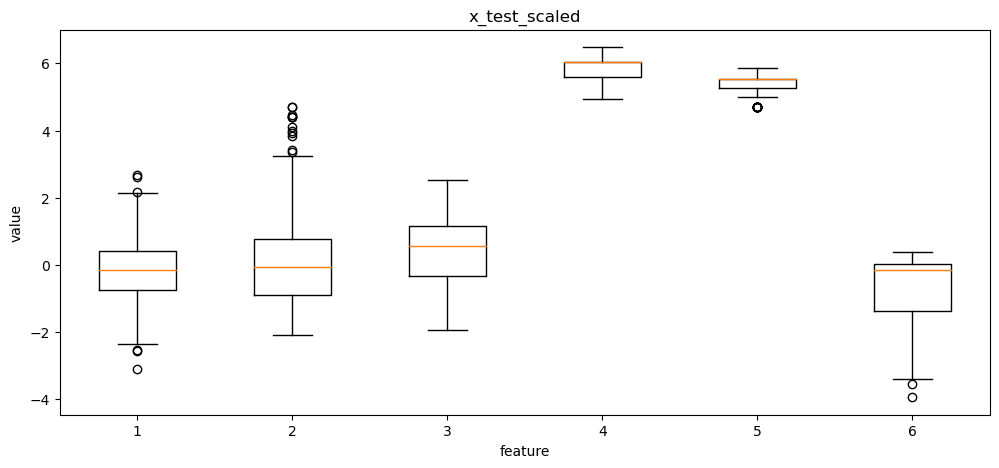

In [28]:
x_3_train_scaled = normalize(x_3_train, x_3_train, "x_train_scaled")
x_3_val_scaled = normalize(x_3_train, x_3_val, "x_val_scaled")
x_3_test_scaled = normalize(x_3_train, x_3_test, "x_test_scaled")

- y

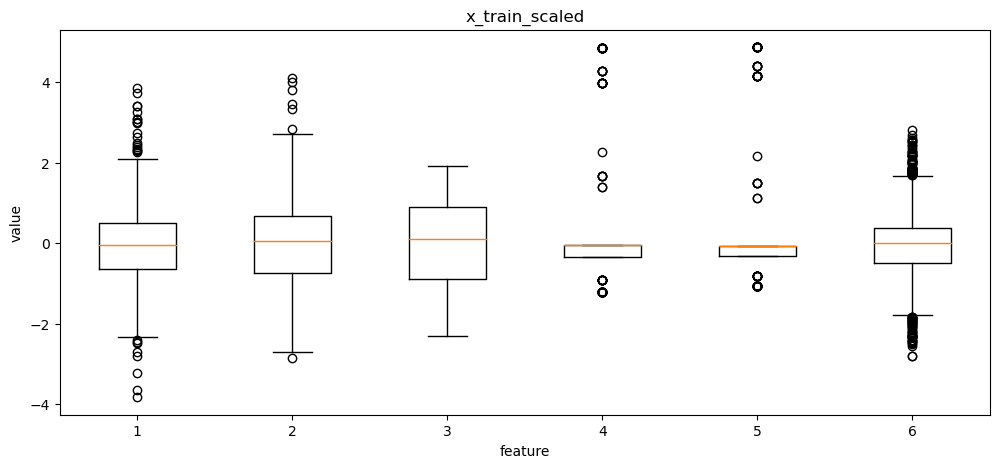

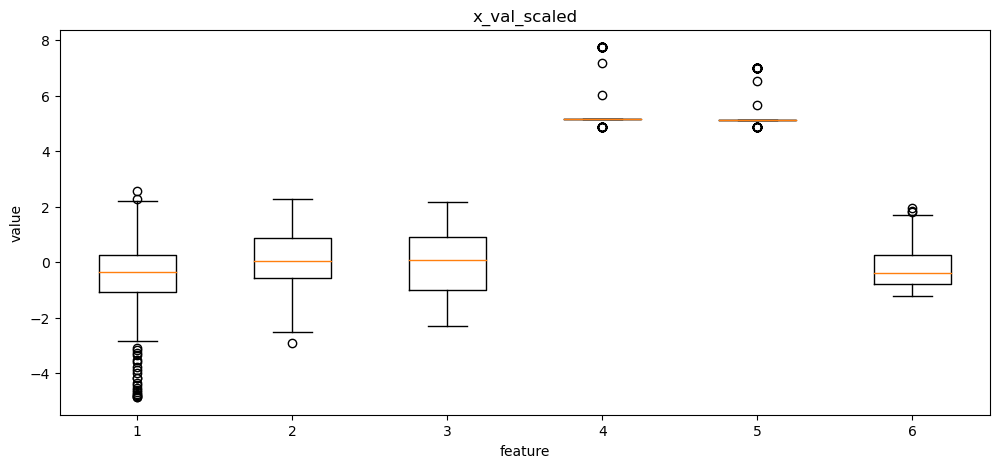

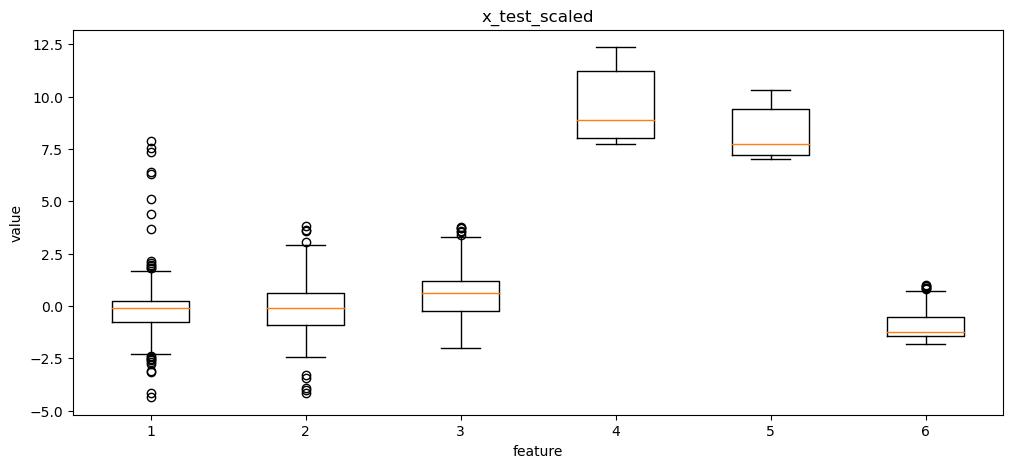

In [56]:
x_4_train_scaled = normalize(x_4_train, x_4_train, "x_train_scaled")
x_4_val_scaled = normalize(x_4_train, x_4_val, "x_val_scaled")
x_4_test_scaled = normalize(x_4_train, x_4_test, "x_test_scaled")

In [29]:
data = pd.read_csv("./target/train.csv")
data.head()

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308


In [30]:
def converting_to_real_dt(col):
    new_col = []
    format_t = '%Y%m%d'
    for i in col:
        dt = datetime.datetime.strptime(str(i), format_t).date()
        new_col.append(dt)
    return new_col

data["date"] = converting_to_real_dt(data["일시"])
data.drop(["일시"], axis=1, inplace=True)

In [31]:
data["광진구"] = min_max_scaler.fit_transform(data["광진구"].to_numpy().reshape(-1,1))
data["동대문구"] = min_max_scaler.fit_transform(data["동대문구"].to_numpy().reshape(-1,1))
data["성동구"] = min_max_scaler.fit_transform(data["성동구"].to_numpy().reshape(-1,1))
data["중랑구"] = min_max_scaler.fit_transform(data["중랑구"].to_numpy().reshape(-1,1))

In [32]:
data_1 = data[["date", "광진구"]]
data_1["real"] = data_1["광진구"]
data_1.drop(["광진구"], axis=1, inplace=True)
data_2 = data[["date", "동대문구"]]
data_2["real"] = data_2["동대문구"]
data_2.drop(["동대문구"], axis=1, inplace=True)
data_3 = data[["date", "성동구"]]
data_3["real"] = data_3["성동구"]
data_3.drop(["성동구"], axis=1, inplace=True)
data_4 = data[["date", "중랑구"]]
data_4["real"] = data_4["중랑구"]
data_4.drop(["중랑구"], axis=1, inplace=True)

/tmp/ipykernel_4154155/1179230848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["real"] = data_1["광진구"]
/tmp/ipykernel_4154155/1179230848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.drop(["광진구"], axis=1, inplace=True)
/tmp/ipykernel_4154155/1179230848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [33]:
data_1_train, data_1_val, data_1_test = spliting(data_1)
data_2_train, data_2_val, data_2_test = spliting(data_2)
data_3_train, data_3_val, data_3_test = spliting(data_3)
data_4_train, data_4_val, data_4_test = spliting(data_4)

In [34]:
y_1_train = data_1_train[["real"]]
y_2_train = data_2_train[["real"]]
y_3_train = data_3_train[["real"]]
y_4_train = data_4_train[["real"]]

In [35]:
y_1_val = data_1_val[["real"]]
y_2_val = data_2_val[["real"]]
y_3_val = data_3_val[["real"]]
y_4_val = data_4_val[["real"]]

In [36]:
y_1_test = data_1_test[["real"]]
y_2_test = data_2_test[["real"]]
y_3_test = data_3_test[["real"]]
y_4_test = data_4_test[["real"]]

- 섞기

In [37]:
train_1 = pd.concat([data_1_train, x_1_train_scaled], axis=1)
train_1 = train_1.sample(frac=1, random_state=1212).reset_index(drop=True)
train_1

,date,real,clear_day,day_view_time,lst,bike_place,bike,population
0,2019-04-30,0.638567,0.590487,0.739256,-0.097905,0.416778,0.432349,-0.213926
1,2019-09-22,0.298340,-1.685117,1.400100,0.414161,0.416778,0.432349,0.605215
2,2020-05-13,0.606033,-0.084583,0.116838,0.798081,2.978791,2.890326,-1.023174
3,2018-04-10,0.172550,0.420114,-0.350105,0.577021,-1.120430,-1.130604,0.714272
4,2018-03-25,0.142123,0.054578,-0.497097,0.141505,-1.291231,-1.330983,0.768727
...,...,...,...,...,...,...,...,...
872,2019-04-10,0.216544,-0.930731,-1.136330,-0.754372,0.416778,0.432349,0.474878
873,2019-08-02,0.521470,-0.117621,-0.253664,1.334516,0.416778,0.432349,-1.875446
874,2019-03-15,0.182561,1.700487,-1.146188,-0.707398,0.416778,0.432349,0.696999
875,2019-10-29,0.506191,-0.996019,-0.350105,-0.197962,0.416778,0.432349,-0.620966


In [38]:
x = sm.add_constant(train_1[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_1[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   real   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.34e-158
Time:                        07:51:19   Log-Likelihood:                 489.02
No. Observations:                 877   AIC:                            -964.0
Df Residuals:                     870   BIC:                            -930.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3397      0.005     72.318

In [39]:
x = train_1[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_1[["real"]].to_numpy()

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

2022-12-13 07:51:19.997530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [42]:
hist = model.fit(x, y, epochs = 200, verbose=0, batch_size=1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [43]:
y_1_pred = model.predict(x_1_test_scaled)
data_1_test["pred"] = y_1_pred
data_1_test.to_csv("./result/mlr_Gwang.csv", encoding="utf-8")
model.evaluate(x_1_test_scaled, y_1_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.0000e+00


/tmp/ipykernel_4154155/3848233834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_test["pred"] = y_1_pred


[0.10633105784654617, 0.0]

In [44]:
y_bias = abs(y_1_test-y_1_pred)**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  real    31.04867
dtype: float64


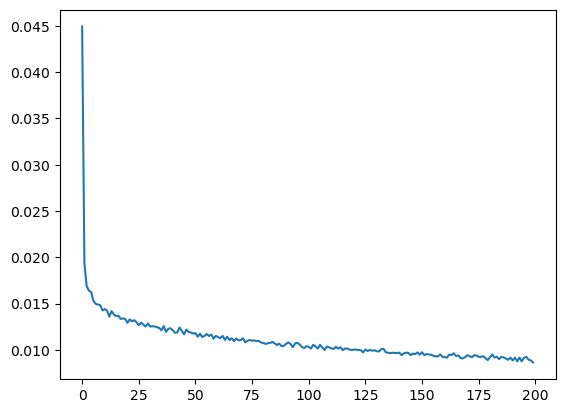

In [45]:
plt.plot(hist.history['loss'])

In [46]:
train_2 = pd.concat([data_2_train, x_2_train_scaled], axis=1)
train_2 = train_2.sample(frac=1, random_state=1212).reset_index(drop=True)

x = sm.add_constant(train_2[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_2[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   real   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.81e-163
Time:                        07:54:43   Log-Likelihood:                 798.33
No. Observations:                 877   AIC:                            -1583.
Df Residuals:                     870   BIC:                            -1549.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2493      0.003     75.509

In [47]:
x = train_2[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_2[["real"]].to_numpy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, epochs = 200, verbose=0, batch_size=1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [48]:
y_2_pred = model.predict(x_2_test_scaled)
data_2_test["pred"] = y_2_pred
data_2_test.to_csv("./result/mlr_Dong.csv", encoding="utf-8")
model.evaluate(x_2_test_scaled, y_2_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.0034


/tmp/ipykernel_4154155/618154171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_test["pred"] = y_2_pred


[0.06705598533153534, 0.0034246575087308884]

In [49]:
y_bias = abs(y_2_test-y_2_pred)**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  real    19.580346
dtype: float64


In [50]:
train_3 = pd.concat([data_3_train, x_3_train_scaled], axis=1)
train_3 = train_3.sample(frac=1, random_state=1212).reset_index(drop=True)

x = sm.add_constant(train_3[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_3[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   real   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.33e-156
Time:                        07:58:23   Log-Likelihood:                 605.94
No. Observations:                 877   AIC:                            -1198.
Df Residuals:                     870   BIC:                            -1164.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3127      0.004     76.059

In [51]:
x = train_3[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_3[["real"]].to_numpy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, epochs = 200, verbose=0, batch_size=1)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                224       
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [52]:
y_3_pred = model.predict(x_3_test_scaled)
data_3_test["pred"] = y_3_pred
data_3_test.to_csv("./result/mlr_Seong.csv", encoding="utf-8")
model.evaluate(x_3_test_scaled, y_3_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.0034


/tmp/ipykernel_4154155/1695016819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3_test["pred"] = y_3_pred


[0.08183516561985016, 0.0034246575087308884]

In [53]:
y_bias = abs(y_3_test-y_3_pred)**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  real    23.895868
dtype: float64


In [57]:
train_4 = pd.concat([data_4_train, x_4_train_scaled], axis=1)
train_4 = train_4.sample(frac=1, random_state=1212).reset_index(drop=True)

x = sm.add_constant(train_4[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_4[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   real   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          4.04e-159
Time:                        11:02:22   Log-Likelihood:                 661.63
No. Observations:                 877   AIC:                            -1309.
Df Residuals:                     870   BIC:                            -1276.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2679      0.004     69.435

In [58]:
x = train_4[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_4[["real"]].to_numpy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, epochs = 200, verbose=0, batch_size=1)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                224       
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [59]:
y_4_pred = model.predict(x_4_test_scaled)
data_4_test["pred"] = y_4_pred
data_4_test.to_csv("./result/mlr_Jung.csv", encoding="utf-8")
model.evaluate(x_4_test_scaled, y_4_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.0034


/tmp/ipykernel_4154155/1330839428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4_test["pred"] = y_4_pred


[0.08795452862977982, 0.0034246575087308884]

In [60]:
y_bias = abs(y_4_test-y_4_pred)**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  real    25.682722
dtype: float64
